# Mysql Intermediate

### CEIL, ROUND, TRUNCATE

#### CEIL
CEIL는 실수 데이터를 올림 할 때 사용합니다.
```
SELECT CountryCode, Language, Percentage, CEIL(Percentage)
FROM countrylanguage
```

#### ROUND
ROUND는 실수데이터를 반올림 할 때 사용합니다.

```
SELECT CountryCode, Language, Percentage, ROUND(Percentage, 0)
FROM countrylanguage
```

#### TRUNCATE
```
SELECT CountryCode, Language, Percentage, TRUNCATE(Percentage, 0)
FROM countrylanguage
```

## Conditional

SQL에서도 다른 언어에서 처럼 조건문 사용이 가능합니다. IF, CASE 에 대해서 설명합니다.

#### IF(조건, 참, 거짓)

- 도시의 인구가 100만이 넘으면 "big city" 그렇지 않으면 "small city"를 출력하는 city_scale 컬럼을 추가
```
SELECT name, population, IF(population > 1000000, "big city", "small city") AS city_scale
FROM city
```

#### IFNULL(참, 거짓)

- 독립년도가 없는 데이터는 0으로 출력
```
SELECT IndepYear, IFNULL(IndepYear, 0) as IndepYear
FROM countr
```

#### CASE

```
CASE
    WHEN (조건1) THEN (출력1)
    WHEN (조건2) THEN (출력2)
END AS (컬럼명)
```

- 나라별로 인구가 10억 이상, 1억 이상, 1억 이하인 컬럼을 추가하여 출력

```
SELECT name, population,
    CASE
	 	 WHEN population > 1000000000 THEN "upper 1 bilion"
	 	 WHEN population > 100000000 THEN "upper 100 milion"
	 	 ELSE "below 100 milion"
    END AS result
FROM country
```

## DATE_FORMAT 

DATE_FORMAT은 날짜 데이터에 대한 포멧을 바꿔줍니다
```
SELECT DATE_FORMAT(payment_date, "%Y-%m") AS monthly, SUM(amount) AS amount
FROM payment
GROUP BY monthly
```

## JOIN

JOIN은 여러개의 테이블에서 데이터를 모아서 보여줄 때 사용됩니다.

#### INNER JOIN

- 두 테이블을 합쳐 id, name, addr 출력
```
SELECT id, user.name, addr.addr
FROM user
JOIN addr
ON user.user_id = addr.user_id
```
- world 데이터베이스에서 도시이름과 국가이름을 출력
```
SELECT country.name AS city_name, city.name AS country_name
FROM city
JOIN country
ON city.CountryCode = country.code
```

#### LEFT JOIN

- 두 테이블을 합쳐 id, name, addr 출력
```
SELECT id, user.name, addr.addr
FROM user
LEFT JOIN addr
ON user.user_id = addr.user_id
```

#### RIGHT JOIN

- 두 테이블을 합쳐 id, name, addr 출력
```
SELECT id, user.name, addr.addr
FROM user
RIGHT JOIN addr
ON user.user_id = addr.user_id
```

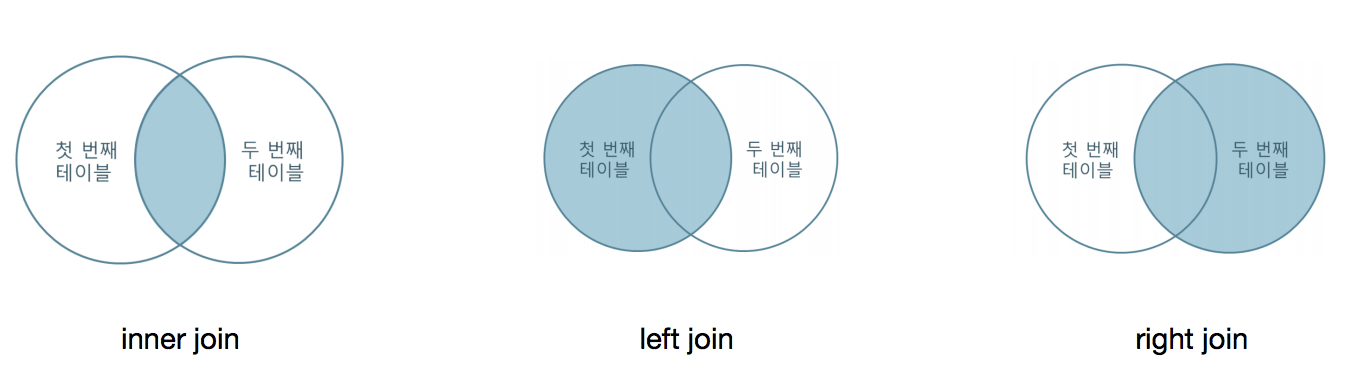

In [1]:
from IPython.display import Image
Image('image4.png',width=800, height=500,)

## UNION

UNION은 SELECT 문의 결과 데이터를 하나로 합쳐서 출력합니다. 

컬럼의 갯수와 타입, 순서가 같아야 합니다.

UNION은 자동으로 distinct를 하여 중복을 제거해 줍니다. 

중복제거를 안하고 컬럼 데이터를 합치고 싶으면 UNION ALL을 사용합니다.

- user 테이블의 name 컬럼과 addr 테이블의 addr 컬럼의 데이터를 하나로 함쳐서 출력

```
SELECT name
FROM user
UNION
SELECT addr
FROM addr
```

- 중복데이터를 제거하지 않고 결과 데이터 합쳐서 출력

```
SELECT name
FROM user
UNION ALL
SELECT addr
FROM addr
```

## Sub-Query

sub query는 query 문 안에 있는 query를 의미합니다. 

SELECT절 FROM절, WHERE 등에 사용이 가능합니다.

- 전체 나라수, 전체 도시수, 전체 언어수를 출력 ( SELECT 절에 사용 )

```
SELECT
    (SELECT count(name) FROM city) AS total_city,
    (SELECT count(name) FROM country) AS total_country,
    (SELECT count(DISTINCT(Language)) FROM countrylanguage) AS total_language
FROM DUAL
```

- 800만 이상되는 도시의 국가코드, 이름, 도시인구수를 출력 ( FROM 절에 사용 )

```
SELECT *
FROM
    (SELECT countrycode, name, population
    FROM city
    WHERE population > 8000000) AS city
JOIN
    (SELECT code, name
    FROM country) AS country
ON city.countrycode = country.code
```

- 800만 이상 도시의 국가코드, 국가이름, 대통령이름을 출력( WHERE 절에 사용 )

```
SELECT code, name, HeadOfState
FROM country
WHERE code IN (
    SELECT DISTINCT(countrycode) FROM city WHERE population > 8000000
)
```

## Index

테이블에서 데이터를 검색할때 빠르게 찾을수 있도록 해주는 기능입니다.** where 절에 들어가는 컬럼을 index로 설정해** 놓으면 설정한 컬럼을 조건으로 검색할때 빠르게 검색할수 있습니다. 자주 검색하는 조건은 index로 설정해 놓으면 좋지만 너무 많은 인덱스가 설정되게 되면 데이터가 입력 될때마다 index에 데이터를 넣어야 함으로 데이터 입력시 속도가 느려질수 있습니다. 그러므로 인덱스는 검색 조건으로 자주 사용하는 컬럼에 설정해 놓으면좋습니다.

- syntax
```
CREATE INDEX 인덱스이름
ON 테이블이름 (컬럼이름1, 컬럼이름2)
```

## View
가상 테이블로 특정 데이터만 보고자 할때 사용합니다. 실제 데이터를 저장하고 있지는 않습니다. 한마디로 특정 컬럼의 데이터를 보여주는 역할만 합니다. 뷰를 사용 함으로 쿼리를 더 단순하게 만들수 있습니다. 한번 생성된 뷰는 수정이 불가능 하며 인덱스설정이 불가능 합니다.
- syntax
```
CREATE VIEW <뷰이름> AS
(QUERY)
```